Link:
https://colab.research.google.com/drive/1YVQF9I3Lm7kpcZ7SnrTsfvD0DMIlGKx_#scrollTo=i8RV3I3P_WAX

# Import Modules


In [ ]:
import pandas as pd
import numpy as np
#import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import alpha
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import statsmodels
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import FTestAnovaPower
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
!pip install pingouin
from pingouin import ancova
from scipy.stats import shapiro, levene

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Dataset

In [ ]:
#df = pd.read_csv("/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
raw_data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv",
                 error_bad_lines=False)
pd.set_option('display.max_columns', None)
df = raw_data

<ipython-input-3-b3ec0f4d8ced>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  raw_data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv",


In [ ]:
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
df.shape 

(65276, 25)

In [ ]:
df.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

# Data Cleaning

In [ ]:
# Age_group__at_arrest_
# Check all possible values of this variable
print(df['Age_group__at_arrest_'].unique())
# Merge the same group with different names
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 17 years and younger', 'Aged 17 years and under')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 65 years and older', 'Aged 65 and older')
# Remove obs when Age_group__at_arrest_ = NaN
df = df[df['Age_group__at_arrest_'].notnull()]

['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']


In [ ]:
# Sex
# Check all possible values of this variable
print(df['Sex'].unique())
# Remove obs when sex = "U"
df = df[df['Sex'] != 'U']

['M' 'F' 'U']


In [ ]:
# Perceived_Race
# Check all possible values of this variable
print(df['Perceived_Race'].unique())
# Remove obs when Perceived_Race = NaN
df = df[df['Perceived_Race'].notnull()]

['White' 'Unknown or Legacy' 'Black' 'South Asian' 'Indigenous'
 'Middle-Eastern' 'Latino' 'East/Southeast Asian' nan]


In [ ]:
# Youth_at_arrest__under_18_years
# Check all possible values of this variable
print(df['Youth_at_arrest__under_18_years'].unique())
# Merge the same group with different names
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')

['Not a youth' 'Youth (aged 17 and younger)'
 'Youth (aged 17 years and under)']


In [ ]:
# Occurrence_Category
# Check all possible values of this variable
print(df['Occurrence_Category'].unique())
# Remove obs when Occurrence_Category = NaN
df = df[df['Occurrence_Category'].notnull()]

['Assault & Other crimes against persons' 'Harassment/Threatening'
 'FTA/FTC/Compliance Check/Parollee' 'Assault' 'Robbery/Theft'
 'Sexual Related Crime' 'Mischief & Fraud' 'Warrant'
 'Police Category - Administrative' 'Robbery & Theft'
 'FTA/FTC, Compliance Check & Parollee' 'Drug Related' 'Weapons'
 'Vehicle Related (inc. Impaired)' 'Other Offence'
 'Harassment & Threatening' 'Weapons & Homicide' 'Break and Enter'
 'Mischief' 'Break & Enter'
 'Sexual Related Crimes & Crimes Against Children'
 'Crimes against Children' 'Police Category - Incident' 'Fraud' 'LLA'
 'Mental Health' 'Other Statute' 'Vehicle Related'
 'Other Statute & Other Incident Type' 'Impaired' 'Homicide' nan]


# Data Wrangling

## Create New Variable - Severity of the Incident (`Score`)



In [ ]:
df['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'FTA/FTC, Compliance Check & Parollee', 'Drug Related', 'Weapons',
       'Vehicle Related (inc. Impaired)', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief', 'Break & Enter',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute', 'Vehicle Related',
       'Other Statute & Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [ ]:
# Replace 'Break & Enter' with 'Break and Enter'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Break & Enter', 'Break and Enter')
# Replace 'FTA/FTC, Compliance Check & Parollee' with 'FTA/FTC/Compliance Check/Parollee'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('FTA/FTC, Compliance Check & Parollee', 'FTA/FTC/Compliance Check/Parollee')
# Replace 'Other Statute & Other Incident Type' with 'Other Statute/Other Incident Type'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Other Statute & Other Incident Type', 'Other Statute/Other Incident Type')
# Replace 'Vehicle Related \(inc\. Impaired.*\)' with 'Vehicle Related'
df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Vehicle Related \(inc\. Impaired.*\)', 'Vehicle Related')

<ipython-input-11-8f9d43e879e6>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Occurrence_Category'] = df['Occurrence_Category'].str.replace('Vehicle Related \(inc\. Impaired.*\)', 'Vehicle Related')


In [ ]:
df['Occurrence_Category'].unique()

array(['Assault & Other crimes against persons', 'Harassment/Threatening',
       'FTA/FTC/Compliance Check/Parollee', 'Assault', 'Robbery/Theft',
       'Sexual Related Crime', 'Mischief & Fraud', 'Warrant',
       'Police Category - Administrative', 'Robbery & Theft',
       'Drug Related', 'Weapons', 'Vehicle Related', 'Other Offence',
       'Harassment & Threatening', 'Weapons & Homicide',
       'Break and Enter', 'Mischief',
       'Sexual Related Crimes & Crimes Against Children',
       'Crimes against Children', 'Police Category - Incident', 'Fraud',
       'LLA', 'Mental Health', 'Other Statute',
       'Other Statute/Other Incident Type', 'Impaired', 'Homicide'],
      dtype=object)

In [ ]:
# Split Occurrence_Category
df[['Occurrence_Category1', 'Occurrence_Category2']] = df['Occurrence_Category'].str.split(' & ', expand=True)
# Unique values
unique_values = pd.concat([df['Occurrence_Category1'], df['Occurrence_Category2']]).unique()
print(unique_values)

['Assault' 'Harassment/Threatening' 'FTA/FTC/Compliance Check/Parollee'
 'Robbery/Theft' 'Sexual Related Crime' 'Mischief' 'Warrant'
 'Police Category - Administrative' 'Robbery' 'Drug Related' 'Weapons'
 'Vehicle Related' 'Other Offence' 'Harassment' 'Break and Enter'
 'Sexual Related Crimes' 'Crimes against Children'
 'Police Category - Incident' 'Fraud' 'LLA' 'Mental Health'
 'Other Statute' 'Other Statute/Other Incident Type' 'Impaired' 'Homicide'
 'Other crimes against persons' None 'Theft' 'Threatening'
 'Crimes Against Children']


In [ ]:
category_scores = {
    'Assault': 10,
    'Harassment/Threatening': 10,
    'FTA/FTC/Compliance Check/Parollee': 5,
    'Robbery/Theft': 15,
    'Sexual Related Crime': 15,
    'Mischief':10,
    'Warrant': 5,
    'Police Category - Administrative': 5,
    'Robbery': 15,
    'Drug Related': 5,
    'Weapons': 15,
    'Vehicle Related': 10,
    'Other Offence': 5,
    'Harassment': 5,
    'Break and Enter': 15,
    'Sexual Related Crimes': 15,
    'Crimes against Children': 15,
    'Police Category - Incident': 10,
    'Fraud': 5,
    'LLA': 5,
    'Mental Health': 5,
    'Other Statute': 5,
    'Other Statute/Other Incident Type':5,
    'Impaired': 10,
    'Homicide': 25,
    'Vehicle Related (inc. Impairedheft' : 10,
    'Other crimes against persons': 10,
    'Theft': 10,
    'Threatening': 10,
    'Crimes Against Children': 15
}

In [ ]:
# Define a function to calculate the total score for each row
def calculate_score(row):
    # Initialize the score to zero
    score = 0
    # Add up the scores for each category
    if row['Occurrence_Category1'] in category_scores:
        score += category_scores[row['Occurrence_Category1']]
    if row['Occurrence_Category2'] in category_scores:
        score += category_scores[row['Occurrence_Category2']]
    # Return the total score
    return score

# Apply the score calculation function to the dataframe
df['Score'] = df.apply(calculate_score, axis=1)
df.head(5)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Occurrence_Category1,Occurrence_Category2,Score
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,Assault,Other crimes against persons,20
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,Assault,Other crimes against persons,20
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,Assault,Other crimes against persons,20
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,Harassment/Threatening,None,10
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,FTA/FTC/Compliance Check/Parollee,None,5


## Create New Variable - Number of Actions at Arrest



In [ ]:
# Create a new column by summing values from multiple columns
df['num_actions_at_arrest'] = (df['Actions_at_arrest___Concealed_i'] + df['Actions_at_arrest___Combative__'] +
                              df['Actions_at_arrest___Resisted__d'] + df['Actions_at_arrest___Mental_inst'] +
                              df['Actions_at_arrest___Assaulted_o'] + df['Actions_at_arrest___Cooperative'])
df.head(5)


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Occurrence_Category1,Occurrence_Category2,Score,num_actions_at_arrest
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,Assault,Other crimes against persons,20,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,Assault,Other crimes against persons,20,0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,Assault,Other crimes against persons,20,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,Harassment/Threatening,None,10,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,FTA/FTC/Compliance Check/Parollee,None,5,0


## Create New Dataframe - Arrests, strip searches, crime severity by person ID, race, and sex

In [ ]:
# Group the data by person ID, sex, and race and count the number of strip searches and arrests
arrest_counts = df.groupby(['PersonID', 'Sex', 'Perceived_Race']).size().reset_index(name='Num_of_Arrests')
strip_search_counts = df[df['StripSearch'] == 1].groupby(['PersonID', 'Sex', 'Perceived_Race']).size().reset_index(name='Num_of_Strip_Searches')
# Calculate the average score per group
avg_score = df.groupby(['PersonID', 'Sex', 'Perceived_Race'])['Score'].mean().reset_index(name='Avg_Score')
# Merge the two tables on person ID, sex, and race
merged_counts = pd.merge(arrest_counts, strip_search_counts, on=['PersonID', 'Sex', 'Perceived_Race'], how='left')
# Merge the average score with the merged_counts table
merged_counts = pd.merge(merged_counts, avg_score, on=['PersonID', 'Sex', 'Perceived_Race'], how='left')
# Replace any missing values with 0
merged_counts.fillna(0, inplace=True)
merged_counts['Strip_Searched_Prop'] = merged_counts['Num_of_Strip_Searches']/merged_counts['Num_of_Arrests']
# sort in descending order
merged_counts.sort_values('Num_of_Arrests', ascending=False)

,PersonID,Sex,Perceived_Race,Num_of_Arrests,Num_of_Strip_Searches,Avg_Score,Strip_Searched_Prop
29676,327486,M,White,53,2.0,7.075472,0.037736
33782,331300,M,Black,41,8.0,10.121951,0.195122
4201,303892,M,Indigenous,37,13.0,14.594595,0.351351
32700,330299,M,Black,35,10.0,13.571429,0.285714
11232,310375,M,Indigenous,33,7.0,12.272727,0.212121
...,...,...,...,...,...,...,...
15382,314235,M,White,1,0.0,10.000000,0.000000
15381,314234,M,Black,1,0.0,15.000000,0.000000
15380,314233,M,White,1,0.0,10.000000,0.000000
15379,314232,F,White,1,0.0,15.000000,0.000000


In [ ]:
df['num_actions_at_arrest'].std()


0.5850469843778611

# Exploratory Data Analysis

## Univariate EDA

It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.

In [ ]:
print(df['Age_group__at_arrest_'].value_counts())

Aged 25 to 34 years        20899
Aged 35 to 44 years        16193
Aged 18 to 24 years        10010
Aged 45 to 54 years         9048
Aged 55 to 64 years         4576
Aged 17 years and under     3031
Aged 65 and older           1317
Name: Age_group__at_arrest_, dtype: int64


In [ ]:
print(df['Sex'].value_counts())

M    52499
F    12575
Name: Sex, dtype: int64


In [ ]:
print(df['StripSearch'].value_counts())

0    57275
1     7799
Name: StripSearch, dtype: int64


In [ ]:
57275/(57275+7799)

0.8801518271506286

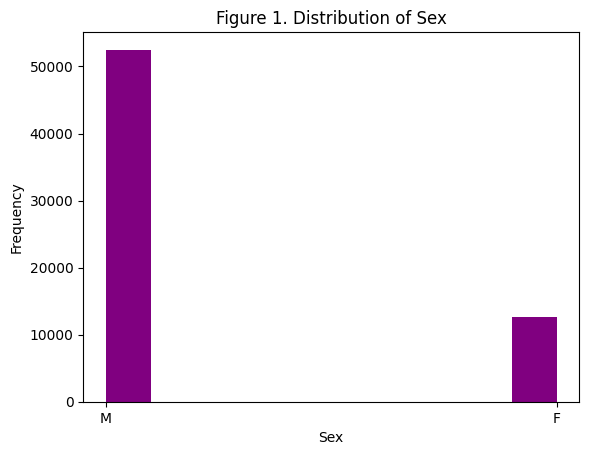

In [ ]:
# Distribution of `Sex`
plt.hist(df['Sex'], color = 'purple')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Figure 1. Distribution of Sex')
plt.show()

In [ ]:
print(df['Perceived_Race'].value_counts())

White                   27630
Black                   17487
Unknown or Legacy        5041
East/Southeast Asian     4402
South Asian              3603
Middle-Eastern           3227
Indigenous               1926
Latino                   1758
Name: Perceived_Race, dtype: int64


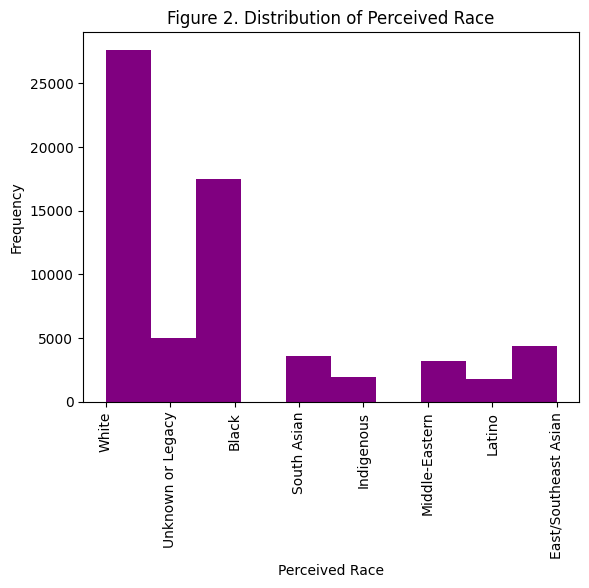

In [ ]:
# Distribution of `Perceived_Race`
plt.hist(df['Perceived_Race'], color = 'purple')
plt.xlabel('Perceived Race')
plt.ylabel('Frequency')
plt.title('Figure 2. Distribution of Perceived Race')
plt.xticks(rotation=90)
plt.show()

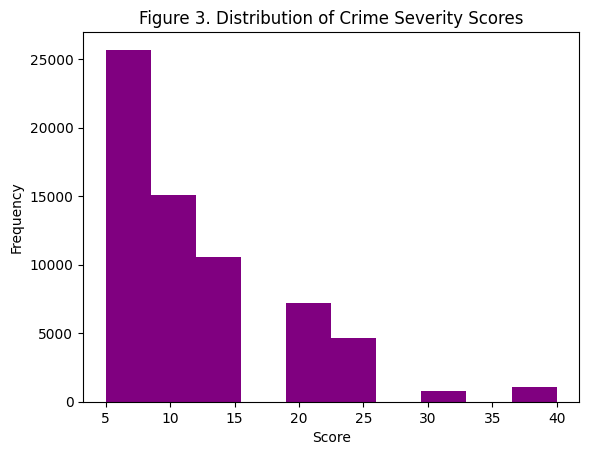

In [ ]:
# Distribution of `Score`
plt.hist(df['Score'], color = 'purple')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Figure 3. Distribution of Crime Severity Scores')
plt.show()

In [ ]:
print(df['Occurrence_Category'].value_counts())

Assault                                            7724
Assault & Other crimes against persons             7234
Robbery & Theft                                    4579
Warrant                                            4376
FTA/FTC/Compliance Check/Parollee                  4244
Police Category - Administrative                   3885
FTA/FTC, Compliance Check & Parollee               3876
Robbery/Theft                                      3751
Drug Related                                       2751
Other Statute & Other Incident Type                2338
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1972
Mischief & Fraud                                   1731
Impaired                                           1362
Harassment/Threatening                             1346
Mischief                                           1321
Harassment & Threatening                           1268
Weapons                                         

## Bivariate & Multivariate EDA

### EDA - Age Group v.s. Sex

In [ ]:
# Create a contingency table of Sex vs Age Group
contingency_table = table = pd.crosstab(df['Age_group__at_arrest_'], df['Sex'])
contingency_table_total = contingency_table.copy()
contingency_table_total['Total'] = contingency_table_total['F'] + contingency_table_total['M']
contingency_table_total

Sex,F,M,Total
Age_group__at_arrest_,,,
Aged 17 years and under,732,2299,3031
Aged 18 to 24 years,2065,7945,10010
Aged 25 to 34 years,4218,16681,20899
Aged 35 to 44 years,3073,13120,16193
Aged 45 to 54 years,1601,7447,9048
Aged 55 to 64 years,676,3900,4576
Aged 65 and older,210,1107,1317


Text(0.5, 1.0, 'Figure 4. Frequency of Arrests in Different Age Groups Grouped by Sex')

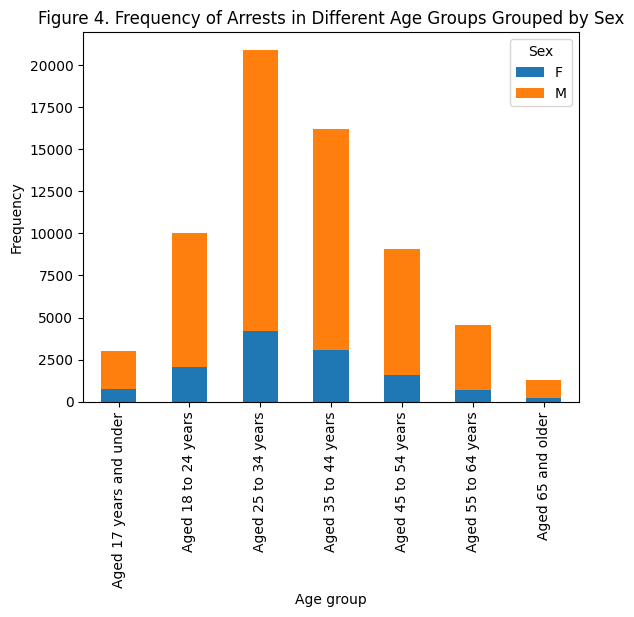

In [ ]:
# Create a stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True)
# Set the labels and title
ax.set_xlabel('Age group')
ax.set_ylabel('Frequency')
ax.set_title('Figure 4. Frequency of Arrests in Different Age Groups Grouped by Sex')

### EDA - Youth v.s. Sex

In [ ]:
# Create a contingency table of Sex vs Youth_at_arrest
contingency_table = table = pd.crosstab(df['Youth_at_arrest__under_18_years'], df['Sex'])
contingency_table_total = contingency_table.copy()
contingency_table_total['Total'] = contingency_table_total['F'] + contingency_table_total['M']
contingency_table_total

Sex,F,M,Total
Youth_at_arrest__under_18_years,,,
Not a youth,11843,50200,62043
Youth (aged 17 years and under),732,2299,3031


Text(0.5, 1.0, 'Frequency of Male and Female in Whether or Not The Arrestee Were Youth')

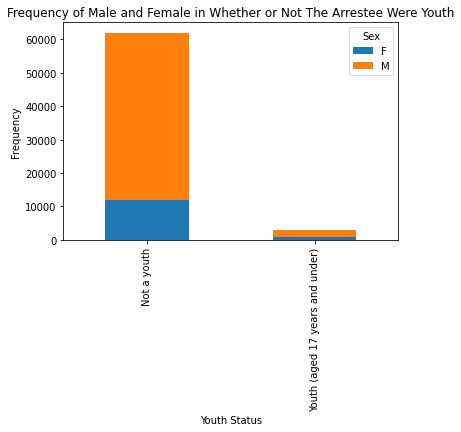

In [ ]:
# Create a stacked bar plot
ax = contingency_table.plot(kind='bar', stacked=True)
# Set the labels and title
ax.set_xlabel('Youth Status')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Male and Female in Whether or Not The Arrestee Were Youth')

### EDA - Youth v.s. Incident Severity

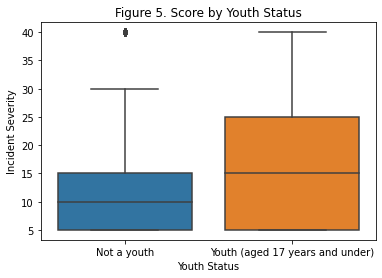

In [ ]:
# Create a boxplot
sns.boxplot(x='Youth_at_arrest__under_18_years', y='Score', data=df)
# Add axis labels and title
plt.xlabel('Youth Status')
plt.ylabel('Incident Severity')
plt.title('Figure 5. Score by Youth Status')
# Show the plot
plt.show()

### EDA - Sex, Youth Status v.s. Incident Severity


In [ ]:
# Group by `Sex` and calculate the incident severity score
quantiles = df.groupby('Sex')['Score'].quantile([0.25, 0.5, 0.75]).unstack()
quantiles.columns = ['Q1', 'Q2', 'Q3']
quantiles.index.name = 'Sex'
print(quantiles)

      Q1    Q2    Q3
Sex                 
F    5.0  10.0  15.0
M    5.0  10.0  15.0


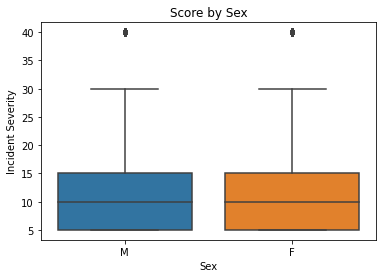

In [ ]:
# Create a boxplot
sns.boxplot(x='Sex', y='Score', data=df)
# Add axis labels and title
plt.xlabel('Sex')
plt.ylabel('Incident Severity')
plt.title('Score by Sex')
# Show the plot
plt.show()

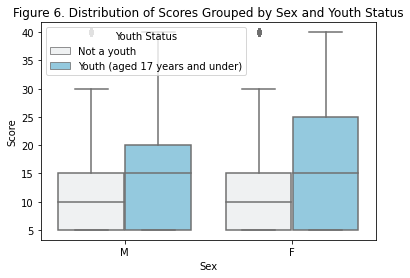

In [ ]:
# Create a boxplot to show the distribution of `Score` grouped by Sex and Youth Status
sns.boxplot(x='Sex', y='Score', hue='Youth_at_arrest__under_18_years', data=df,color='skyblue' )
# Change the title of the legend
plt.legend(title='Youth Status', loc = 'upper left')
# Add title
plt.title('Figure 6. Distribution of Scores Grouped by Sex and Youth Status')
# Show the plot
plt.show()

### EDA - Number of actions at arrest v.s. Strip Search

In [ ]:
grouped_data = df.groupby('num_actions_at_arrest').agg(
    Total_Arrests=pd.NamedAgg(column='StripSearch', aggfunc='count'),
    Total_StripSearches=pd.NamedAgg(column='StripSearch', aggfunc='sum'),
).reset_index()
grouped_data['Total_Non_StripSearches'] = grouped_data['Total_Arrests'] - grouped_data['Total_StripSearches']
grouped_data['StripSearched_Prop'] = grouped_data['Total_StripSearches'] / grouped_data['Total_Arrests']
grouped_data.head()

,num_actions_at_arrest,Total_Arrests,Total_StripSearches,Total_Non_StripSearches,StripSearched_Prop
0,0,30599,3328,27271,0.108762
1,1,32125,3807,28318,0.118506
2,2,1939,535,1404,0.275915
3,3,411,129,282,0.313869


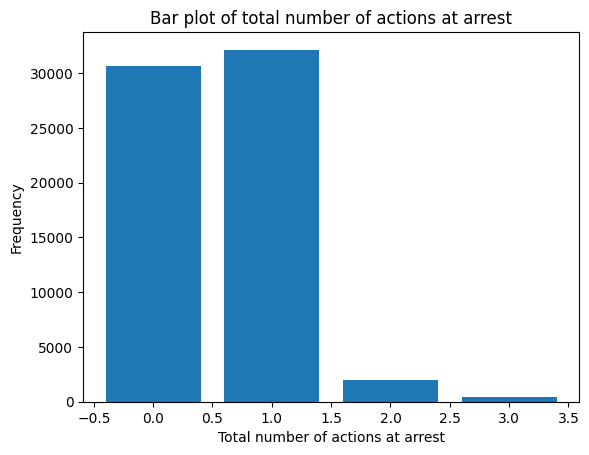

In [ ]:
# Group the data by the total number of actions at arrest
grouped_action = df.groupby('num_actions_at_arrest')['num_actions_at_arrest'].count()
# Create a bar plot
plt.bar(grouped_action.index, grouped_action.values)
# Add labels and title
plt.xlabel('Total number of actions at arrest')
plt.ylabel('Frequency')
plt.title('Bar plot of total number of actions at arrest')
# Show the plot
plt.show()

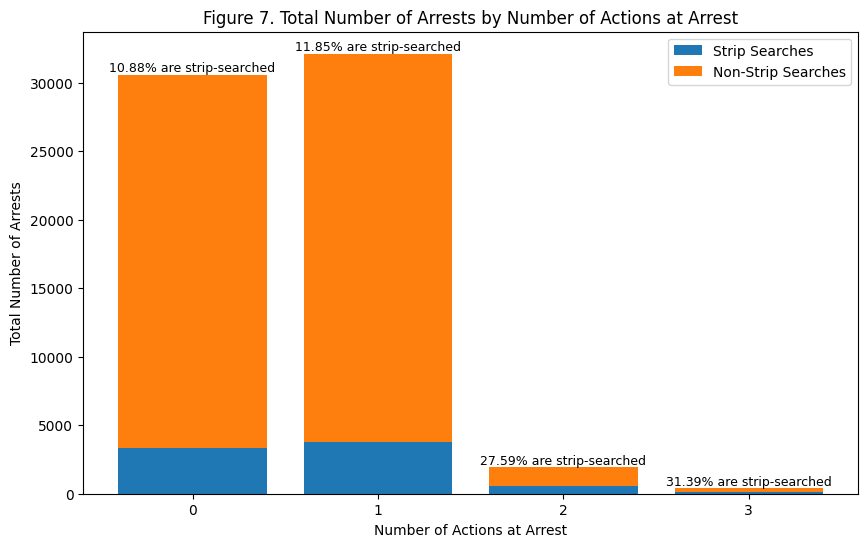

In [ ]:
# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped_data['num_actions_at_arrest'], grouped_data['Total_StripSearches'], label='Strip Searches')
ax.bar(grouped_data['num_actions_at_arrest'], grouped_data['Total_Non_StripSearches'], bottom=grouped_data['Total_StripSearches'], label='Non-Strip Searches')

ax.set_title('Figure 7. Total Number of Arrests by Number of Actions at Arrest')
ax.set_xlabel('Number of Actions at Arrest')
ax.set_ylabel('Total Number of Arrests')
ax.set_xticks(grouped_data['num_actions_at_arrest'].unique())
ax.legend()
for index, row in grouped_data.iterrows():
    ax.text(row['num_actions_at_arrest'], row['Total_Arrests'], f"{row['StripSearched_Prop']:.2%} are strip-searched", ha='center', va='bottom', fontsize=9)

plt.show()

### EDA - Sex v.s. Strip Search


In [ ]:
# Create a contingency table of Strip Search vs Sex
contingency_table = pd.crosstab(df['Sex'], df['StripSearch'])
contingency_table['Proportion'] = contingency_table[1.0]/(contingency_table[1.0] + contingency_table[0.0])
contingency_table.sort_values('Proportion', ascending=False)

StripSearch,0,1,Proportion
Sex,,,
M,45983,6516,0.124117
F,11292,1283,0.102028


### EDA - Race v.s. Strip Search

In [ ]:
# Create a contingency table of Strip Search vs Race
contingency_table = pd.crosstab(df['Perceived_Race'], df['StripSearch'])
contingency_table['Total Number of Arrests'] = contingency_table[1.0] + contingency_table[0.0]
contingency_table['Strip_Searched_Prop'] = contingency_table[1.0]/(contingency_table[1.0] + contingency_table[0.0])
contingency_table.sort_values('Strip_Searched_Prop', ascending=False)

StripSearch,0,1,Total Number of Arrests,Strip_Searched_Prop
Perceived_Race,,,,
Indigenous,1620,306,1926,0.158879
Black,15053,2434,17487,0.139189
White,24064,3566,27630,0.129063
Unknown or Legacy,4506,535,5041,0.106130
East/Southeast Asian,4061,341,4402,0.077465
Latino,1626,132,1758,0.075085
South Asian,3346,257,3603,0.071329
Middle-Eastern,2999,228,3227,0.070654


### EDA - Youth Status v.s. Strip Search

In [ ]:
# Create a contingency table of Youth Status v.s. Strip Search
contingency_table = pd.crosstab(df['Youth_at_arrest__under_18_years'], df['StripSearch'])
contingency_table['Proportion'] = contingency_table[1.0]/(contingency_table[1.0] + contingency_table[0.0])
contingency_table.sort_values('Proportion', ascending=False)

StripSearch,0,1,Proportion
Youth_at_arrest__under_18_years,,,
Not a youth,54524,7519,0.121190
Youth (aged 17 years and under),2751,280,0.092379


### EDA - Crime Severity v.s. Strip Search Indicator

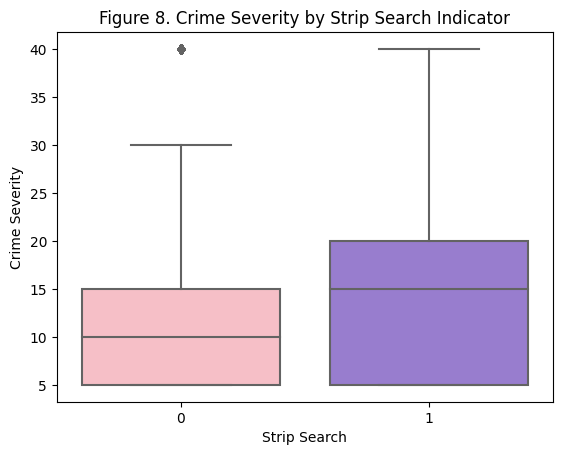

In [ ]:
# Create a boxplot
sns.boxplot(x='StripSearch', y='Score', data=df, palette=['#FFB6C1', '#9370DB'])
# Add axis labels and title
plt.xlabel('Strip Search')
plt.ylabel('Crime Severity')
plt.title('Figure 8. Crime Severity by Strip Search Indicator')
# Show the plot
plt.show()

### EDA - Check for Linear Relationships

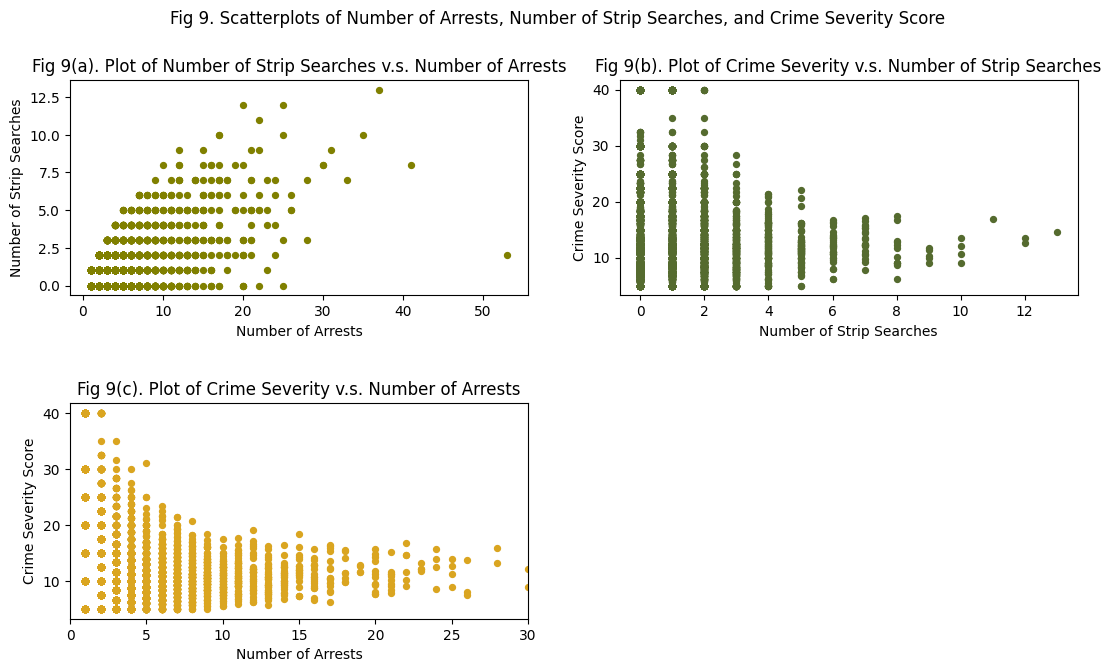

In [ ]:
# check whether there is a linear relationship between number of arrests and number of strip searches
fig = plt.figure(figsize=(13, 7))
fig.subplots_adjust(hspace=0.5)

plt.subplot(221) 

plt.scatter(merged_counts['Num_of_Arrests'], merged_counts['Num_of_Strip_Searches'], s=18, c = 'olive')
plt.xlabel('Number of Arrests')
plt.ylabel('Number of Strip Searches')
plt.title('Fig 9(a). Plot of Number of Strip Searches v.s. Number of Arrests')

plt.subplot(222) 

plt.scatter(merged_counts['Num_of_Strip_Searches'], merged_counts['Avg_Score'], s=18, c='darkolivegreen')
plt.xlabel('Number of Strip Searches')
plt.ylabel('Crime Severity Score')
plt.title('Fig 9(b). Plot of Crime Severity v.s. Number of Strip Searches')

plt.subplot(223) 

plt.scatter(merged_counts['Num_of_Arrests'], merged_counts['Avg_Score'], s=18, c='goldenrod')
plt.xlim(0, 30)
plt.xlabel('Number of Arrests')
plt.ylabel('Crime Severity Score')
plt.title('Fig 9(c). Plot of Crime Severity v.s. Number of Arrests')

fig.suptitle('Fig 9. Scatterplots of Number of Arrests, Number of Strip Searches, and Crime Severity Score')
plt.show()

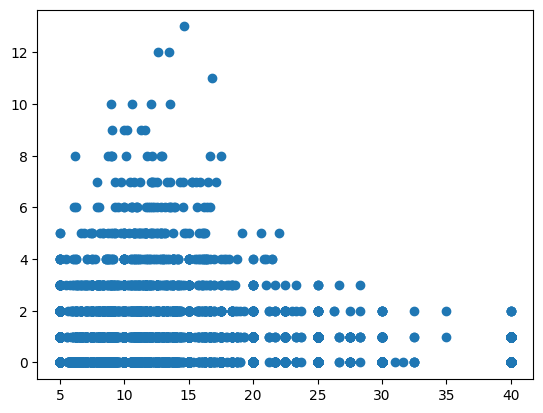

In [ ]:
plt.scatter(merged_counts['Num_of_Strip_Searches'], merged_counts['Avg_Score'])

(0.0, 30.0)

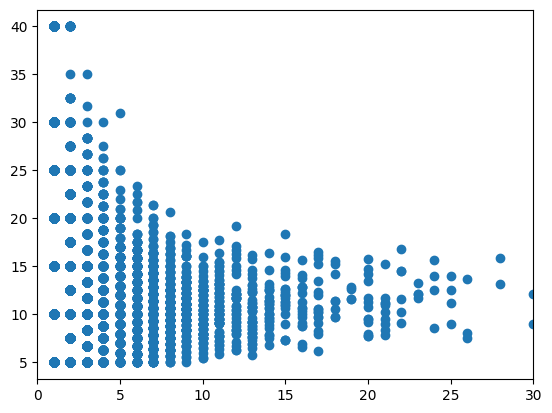

In [ ]:
plt.scatter(merged_counts['Num_of_Arrests'], merged_counts['Avg_Score'])
plt.xlim(0, 30)

# Power Analysis

In [ ]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
male = merged_counts[merged_counts['Sex'] == 'M']
female = merged_counts[merged_counts['Sex'] == 'F']
male_score = male['Avg_Score']
female_score = female['Avg_Score']

In [ ]:
effect_size = Cohens_d(male_score,female_score)
alpha = 0.05
power = 0.8
ratio_ =len(male_score)/len(female_score) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for severity score',effect_size)

Effect size (Cohen's D) for severity score -0.08745858033778126


In [ ]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('%.3f' % sample_size, 'samples needed for male severity score') 
print('Actual size of male:', len(male_score))
nobs2 =ratio_*sample_size
print('%.3f' % nobs2, 'samples needed for female severity score')
print('Actual size of female:', len(female_score))

1284.960 samples needed for male severity score
Actual size of male: 30572
5101.793 samples needed for female severity score
Actual size of female: 7700


In [ ]:
# Parameters for the power analysis
effect_size = 0.2       # small effect size
alpha = 0.05            # Significance level
power = 0.8             # Desired statistical power
num_groups = 8          # Number of groups in Perceived_Race

# Calculate the required sample size
power_analysis = FTestAnovaPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, k_groups=num_groups)
# Print the required sample size per group
print("Required total sample size:", np.ceil(sample_size))

Required total sample size: 366.0


In [ ]:
# Group by 'Perceived_Race' and count the occurrences
grouped_data = df.groupby('Perceived_Race').size().reset_index(name='count')
print(grouped_data)

         Perceived_Race  count
0                 Black  17032
1  East/Southeast Asian   4111
2            Indigenous   1888
3                Latino   1636
4        Middle-Eastern   3059
5           South Asian   3392
6     Unknown or Legacy   4887
7                 White  26866


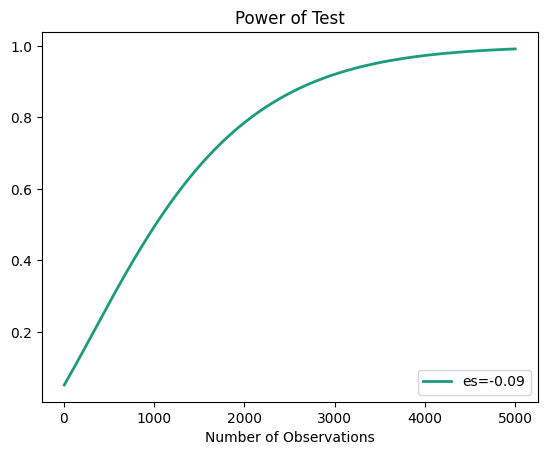

In [ ]:
#power curve

#effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 5000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=np.array([-0.087]))
  
plt.show()

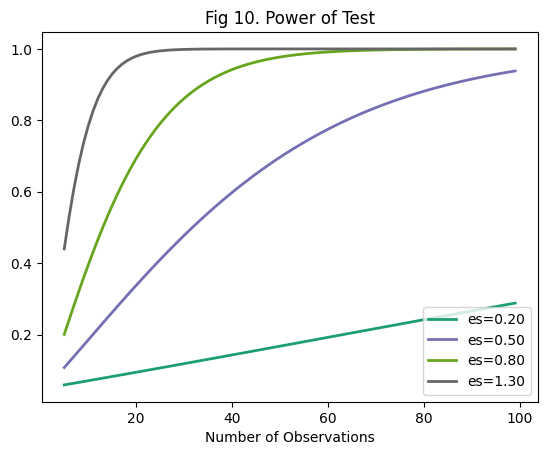

In [ ]:
#power curve

effect_sizes = np.array([0.2, 0.5, 0.8, 1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
plt.title('Fig 10. Power of Test')
  
plt.show()

# Check for Assumptions

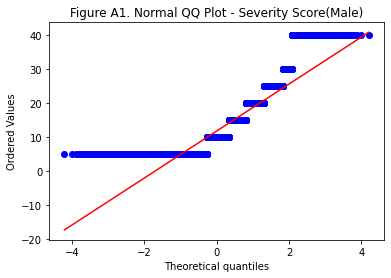

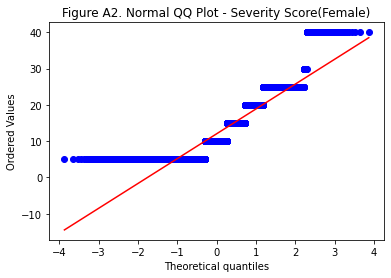

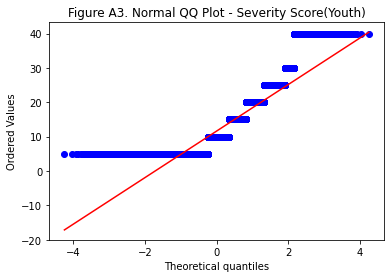

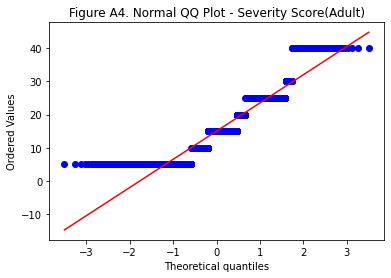

<Figure size 432x288 with 0 Axes>

In [ ]:
# Split the data
Male_score = df.loc[df['Sex'] == 'M', 'Score']
Female_score = df.loc[df['Sex'] == 'F', 'Score']
Not_youth_score = df.loc[df['Youth_at_arrest__under_18_years'] == 'Not a youth', 'Score']
Youth_score = df.loc[df['Youth_at_arrest__under_18_years'] != 'Not a youth', 'Score']
# Check for Normality - Normal QQ Plot
stats.probplot(Male_score, dist='norm', plot=plt)
plt.title('Figure A1. Normal QQ Plot - Severity Score(Male)')
plt.show()
plt.savefig('A1.png')
stats.probplot(Female_score, dist='norm', plot=plt)
plt.title('Figure A2. Normal QQ Plot - Severity Score(Female)')
plt.show()
plt.savefig('A2.png')
stats.probplot(Not_youth_score, dist='norm', plot=plt)
plt.title('Figure A3. Normal QQ Plot - Severity Score(Youth)')
plt.show()
plt.savefig('A3.png')
stats.probplot(Youth_score, dist='norm', plot=plt)
plt.title('Figure A4. Normal QQ Plot - Severity Score(Adult)')
plt.show()
plt.savefig('A4.png')


In [ ]:
# Perform the Shapiro-Wilk test for normality
stat_M, p_M = stats.shapiro(Male_score)
stat_F, p_F = stats.shapiro(Female_score)
stat_NY, p_NY = stats.shapiro(Not_youth_score)
stat_Y, p_Y = stats.shapiro(Youth_score)
print("Test statistic(Male):", stat_M)
print("p-value(Male):", p_M)
print("Test statistic(Female):", stat_F)
print("p-value(Female):", p_F)
print("Test statistic(NotYouth):", stat_NY)
print("p-value(NotYouth):", p_NY)
print("Test statistic(Youth):", stat_Y)
print("p-value(Youth):", p_Y)

Test statistic(Male): 0.814173698425293
p-value(Male): 0.0
Test statistic(Female): 0.835439920425415
p-value(Female): 0.0
Test statistic(NotYouth): 0.81630539894104
p-value(NotYouth): 0.0
Test statistic(Youth): 0.8749144673347473
p-value(Youth): 4.203895392974451e-44


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Figure A5. Variance of Score Grouped by Sex and Youth Status')

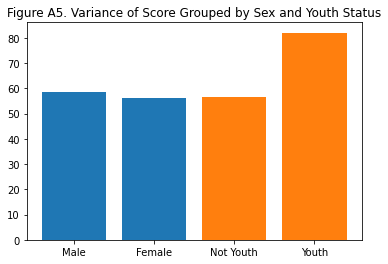

In [ ]:
# Check for Varaince
# Create a bar chart of the variances for each group
variances = [np.var(Male_score), np.var(Female_score)]
labels = ['Male', 'Female']
plt.bar(labels, variances)

variances = [np.var(Not_youth_score), np.var(Youth_score)]
labels = ['Not Youth', 'Youth']
plt.bar(labels, variances)
plt.title('Figure A5. Variance of Score Grouped by Sex and Youth Status')

# Welch's t-tests & 95% CI

## Sex v.s. Score(crime severity)



In [ ]:
# Welch's t-test Sex & Score
Male_score = merged_counts.loc[merged_counts['Sex'] == 'M', 'Avg_Score']
Female_score = merged_counts.loc[merged_counts['Sex'] == 'F', 'Avg_Score']
print(ttest_ind(Male_score, Female_score, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Male_score)+len(Female_score)-2, 
                      loc=np.mean(Male_score)-np.mean(Female_score), 
                      scale=np.sqrt(stats.sem(Male_score)**2 + stats.sem(Female_score)**2))
print(ci)


Ttest_indResult(statistic=-6.649239453451925, pvalue=3.0670078139878564e-11)
(-0.7642064900310611, -0.4162412103479124)


## Race(Indigenous & Black) v.s. Strip Searches

In [ ]:
# Welch's t-test Race(Indigenous v.s. others) & Num_of_Strip_Searches
Ind_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] == 'Indigenous', 'Num_of_Strip_Searches']
non_Ind_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] != 'Indigenous', 'Num_of_Strip_Searches']
print(ttest_ind(Ind_number_of_strip_searches, non_Ind_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Ind_number_of_strip_searches)+len(non_Ind_number_of_strip_searches)-2, 
                      loc=np.mean(Ind_number_of_strip_searches)-np.mean(non_Ind_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(Ind_number_of_strip_searches)**2 + stats.sem(non_Ind_number_of_strip_searches)**2))
print(ci)

# Welch's t-test Race(Black v.s. others) & Num_of_Strip_Searches
Black_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] == 'Black', 'Num_of_Strip_Searches']
non_Black_number_of_strip_searches = merged_counts.loc[merged_counts['Perceived_Race'] != 'Black', 'Num_of_Strip_Searches']
print(ttest_ind(Black_number_of_strip_searches, non_Black_number_of_strip_searches, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(Black_number_of_strip_searches)+len(non_Black_number_of_strip_searches)-2, 
                      loc=np.mean(Black_number_of_strip_searches)-np.mean(non_Black_number_of_strip_searches), 
                      scale=np.sqrt(stats.sem(Black_number_of_strip_searches)**2 + stats.sem(non_Black_number_of_strip_searches)**2))
print(ci)

Ttest_indResult(statistic=5.396737166542, pvalue=8.867413873048491e-08)
(0.11826023555506546, 0.2531523113023786)
Ttest_indResult(statistic=7.776796120942398, pvalue=7.89264712754751e-15)
(0.04463440556290163, 0.07471446910704779)


## Strip Search Indicator v.s. Number of Actions at Arrest

In [ ]:
# Welch's t-test Race(Black v.s. others) & Num_of_Strip_Searches
strip_searched_actions = df.loc[df['StripSearch'] == 1, 'num_actions_at_arrest']
non_strip_searched_actions = df.loc[df['StripSearch'] != 1, 'num_actions_at_arrest']
print(ttest_ind(strip_searched_actions, non_strip_searched_actions, equal_var=False))
# calculate confidence interval
ci = stats.t.interval(0.95, len(strip_searched_actions)+len(non_strip_searched_actions)-2, 
                      loc=np.mean(strip_searched_actions)-np.mean(non_strip_searched_actions), 
                      scale=np.sqrt(stats.sem(strip_searched_actions)**2 + stats.sem(non_strip_searched_actions)**2))
print(ci)

Ttest_indResult(statistic=14.577336114847178, pvalue=1.2966046084130853e-47)
(0.10104300151051508, 0.13243541789310748)


# ANCOVA

In [ ]:
# Check normality assumption using the Shapiro-Wilk test:
# For Num_of_Strip_Searches
_, p_value_strip_searches = shapiro(merged_counts['Num_of_Strip_Searches'])
print("P-value for Shapiro-Wilk test on Num_of_Strip_Searches:", p_value_strip_searches)

# For Avg_Score
_, p_value_avg_score = shapiro(merged_counts['Avg_Score'])
print("P-value for Shapiro-Wilk test on Avg_Score:", p_value_avg_score)

P-value for Shapiro-Wilk test on Num_of_Strip_Searches: 0.0
P-value for Shapiro-Wilk test on Avg_Score: 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#Check homogeneity of variances assumption using Levene's test:
# For the first ANCOVA model
_, p_value_levene_race = levene(*[group['Num_of_Strip_Searches'].dropna() for _, group in merged_counts.groupby('Perceived_Race')])
print("P-value for Levene's test on Num_of_Strip_Searches by Perceived_Race:", p_value_levene_race)

# For the second ANCOVA model
_, p_value_levene_sex = levene(*[group['Avg_Score'].dropna() for _, group in merged_counts.groupby('Sex')])
print("P-value for Levene's test on Avg_Score by Sex:", p_value_levene_sex)


P-value for Levene's test on Num_of_Strip_Searches by Perceived_Race: 6.659784031794082e-100
P-value for Levene's test on Avg_Score by Sex: 1.1886725437612497e-08


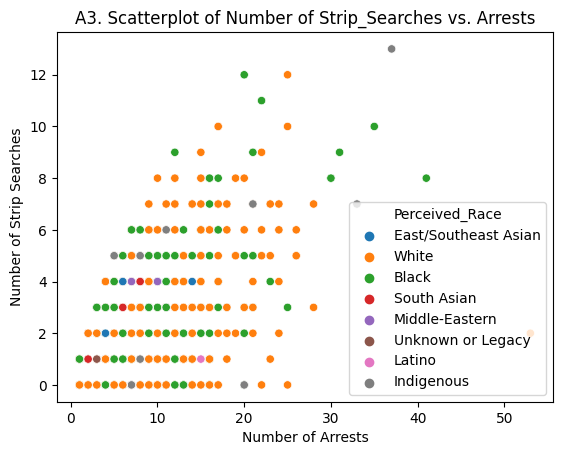

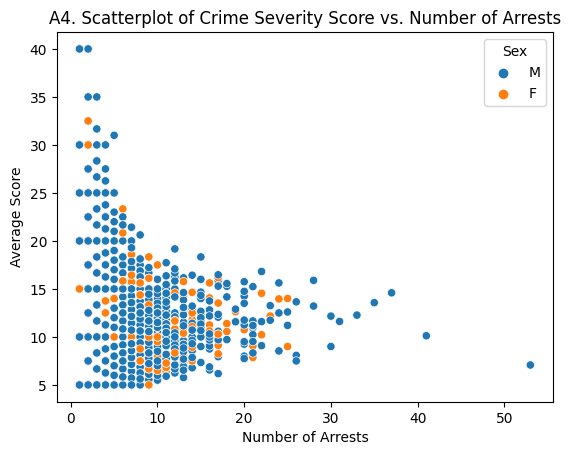

In [ ]:
# Check linearity assumption by creating scatterplots
# For the first ANCOVA model
sns.scatterplot(data=merged_counts, x='Num_of_Arrests', y='Num_of_Strip_Searches', hue='Perceived_Race')
plt.title('A3. Scatterplot of Number of Strip_Searches vs. Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Number of Strip Searches')
plt.show()

# For the second ANCOVA model
sns.scatterplot(data=merged_counts, x='Num_of_Arrests', y='Avg_Score', hue='Sex')
plt.title('A4. Scatterplot of Crime Severity Score vs. Number of Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Average Score')
plt.show()

## ANCOVA(Score ~ Sex, controlling for number of arrests and number of strip searches)

In [ ]:
# Perform the ANCOVA

ancova(data=merged_counts, dv='Avg_Score', covar=['Num_of_Arrests', 'Num_of_Strip_Searches'], between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,2.267527e+03,1,44.523271,2.545987e-11,0.001104
1,Num_of_Arrests,2.085050e+04,1,409.402937,1.395809e-90,0.010057
2,Num_of_Strip_Searches,1.143583e+04,1,224.544467,1.263886e-50,0.005541
3,Residual,2.052389e+06,40299,NaN,NaN,NaN


## ANCOVA(Number of Strip Searches ~ Race, controlling for the number of arrests and severity score)

In [ ]:
# Perform the ANCOVA

ancova(data=merged_counts, dv='Num_of_Strip_Searches', covar=['Num_of_Arrests', 'Avg_Score'], between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,20.678297,7,12.078881,1.683704e-15,0.002094
1,Num_of_Arrests,5891.570799,1,24090.236938,0.000000e+00,0.374169
2,Avg_Score,54.043356,1,220.979648,7.498738e-50,0.005454
3,Residual,9854.160539,40293,NaN,NaN,NaN


# Logistic Regression

## Model Fitting

In [ ]:
# Perform dummy coding on all categorical variables
df_dummies = pd.get_dummies(df[['Perceived_Race', 'Sex', 'Youth_at_arrest__under_18_years']], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)
df = df.loc[:, ~df.columns.duplicated()]

# Define independent variables and dependent variable
X = df[['Score', 'num_actions_at_arrest'] + list(df_dummies.columns)]
y = df['StripSearch']

In [ ]:
# Balancing data using SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print(sum(y == 1))
print(sum(y == 0))
print(sum(y_resampled == 1))
print(sum(y_resampled == 0))


7799
57275
57275
57275


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2178, stratify=y_resampled)

#fit and see summary (we are used to this now)
OLS = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     423.5
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        06:16:56   Log-Likelihood:                -64239.
No. Observations:               91640   AIC:                         1.285e+05
Df Residuals:                   91628   BIC:                         1.286e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
# print odds ratios of features
print(np.exp(OLS.params))

const                                                              1.442557
Score                                                              1.007225
num_actions_at_arrest                                              1.067091
Perceived_Race_East/Southeast Asian                                0.843935
Perceived_Race_Indigenous                                          1.037961
Perceived_Race_Latino                                              0.803546
Perceived_Race_Middle-Eastern                                      0.818729
Perceived_Race_South Asian                                         0.819358
Perceived_Race_Unknown or Legacy                                   0.913792
Perceived_Race_White                                               0.975680
Sex_M                                                              1.070669
Youth_at_arrest__under_18_years_Youth (aged 17 years and under)    0.848950
dtype: float64


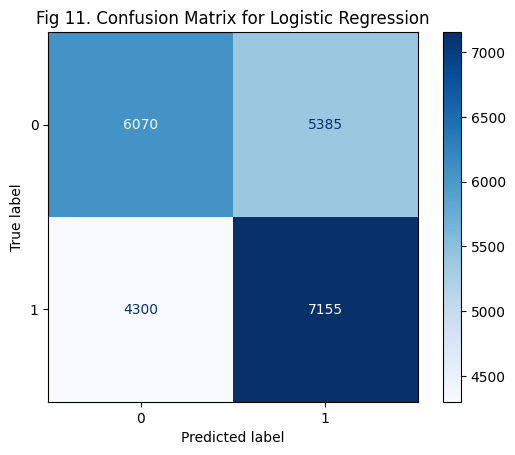

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Fig 11. Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='binary')  
print("Precision:", precision)

Accuracy: 0.5772588389349629
Precision: 0.5705741626794258


In [ ]:
4300+7155

11455

## Prediction Interval(抄的lab的code)

In [ ]:
#Get the mean prediction, confidence interval boundaries, prediction interval boundaries
sm_pred = OLS.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.05)
sm_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
33091,0.489527,0.006378,0.477027,0.502028,-0.466518,1.445572
4267,0.483007,0.006190,0.470875,0.495140,-0.473033,1.439048
69136,0.516835,0.003115,0.510728,0.522941,-0.439148,1.472817
59122,0.510315,0.003096,0.504247,0.516383,-0.445668,1.466297
74630,0.540037,0.003527,0.533124,0.546949,-0.415951,1.496025


In [ ]:
df_assess = OLS.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.1)[['obs_ci_lower', 'obs_ci_upper']]
df_assess

,obs_ci_lower,obs_ci_upper
33091,-0.312808,1.291863
4267,-0.319324,1.285339
69136,-0.285449,1.319118
59122,-0.291968,1.312598
74630,-0.262251,1.342325
...,...,...
114038,-0.015663,1.588985
22456,-0.467875,1.136868
35240,-0.417958,1.186825
24557,-0.183479,1.421089


In [ ]:
#examine what percentage of target values in the test data were within the prediction intervals:
ols_correct = np.mean(y_test.between(df_assess['obs_ci_lower'], df_assess['obs_ci_upper']))
print(f"{ols_correct:.2%} of the prediction intervals contain true target.")

99.91% of the prediction intervals contain true target.
